<a href="https://colab.research.google.com/github/BHANAPEESHAN/CNN_Projects_/blob/main/FruitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="bhanapeeshan"
os.environ['KAGGLE_KEY']="646853511eaba7e71ae9a0d4d3c4af8a"
!kaggle datasets download -d ashleshaprix/fruit-360-data

 99% 403M/408M [00:04<00:00, 74.6MB/s]
100% 408M/408M [00:04<00:00, 96.6MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/fruit-360-data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done Unzipping')

Done Unzipping


In [ ]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list=os.listdir("/content/fruits-360/Training")
print(data_dir_list)
path,dirs,files=next(os.walk("/content/fruits-360/Training"))
file_count=len(files)

['Cherry Wax Red', 'Cherry Wax Black', 'Grapefruit White', 'Apple Red Yellow', 'Clementine', 'Peach', 'Grape Pink', 'Apple Golden 1', 'Apple Granny Smith', 'Cherry Wax Yellow', 'Cherry 2', 'Papaya', 'Quince', 'Apple Braeburn', 'Cactus fruit', 'Pineapple', 'Lychee', 'Salak', 'Nectarine', 'Huckleberry', 'Raspberry', 'Apple Red Delicious', 'Peach Flat', 'Physalis with Husk', 'Orange', 'Tomato 3', 'Pomegranate', 'Pear Monster', 'Tamarillo', 'Apple Golden 2', 'Tomato Maroon', 'Apple Red 3', 'Granadilla', 'Cocos', 'Pepino', 'Kiwi', 'Tomato 1', 'Mango', 'Kumquats', 'Mandarine', 'Lemon', 'Apple Golden 3', 'Strawberry Wedge', 'Cherry Rainier', 'Pitahaya Red', 'Avocado', 'Banana Red', 'Physalis', 'Strawberry', 'Tomato Cherry Red', 'Carambula', 'Tomato 2', 'Grape White 2', 'Apple Red 2', 'Cantaloupe 2', 'Pear Williams', 'Limes', 'Avocado ripe', 'Pear Abate', 'Cherry 1', 'Pear', 'Banana', 'Grapefruit Pink', 'Maracuja', 'Apple Red 1', 'Pineapple Mini', 'Walnut', 'Tangelo', 'Cantaloupe 1', 'Passion 

In [ ]:
import os
import numpy as np
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.image import imread
import pathlib


image_folder= data_dir_list
nimgs={}

for i in image_folder:
  nimages=len(os.listdir('/content/fruits-360/Training/'+i+'/'))
  nimgs[i]=nimages
plt.figure(figsize=(200,100))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.keys()))
plt.title("Distribution of classes in train",)
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
callbacks=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')    #'auto'
bestmodelfile='/content/CNN_aug_best_weights.h5'
bestmodel=ModelCheckpoint(bestmodelfile,monitor='val_acc',verbose=1,save_best_only=True)

In [ ]:
import PIL
image = PIL.Image.open("/content/fruits-360/Training/Apple Braeburn/0_100.jpg")
width, height = image.size
print(width, height)

100 100


In [ ]:
img_width=100
img_height=100
batch_size=128

In [ ]:
TRAINING_DIR = "/content/fruits-360/Training"
train_datagen=ImageDataGenerator(rescale=1/255.0)
train_gen=train_datagen.flow_from_directory(TRAINING_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 41322 images belonging to 81 classes.


In [ ]:
VAL_DIR = "/content/fruits-360/Test"
val_datagen=ImageDataGenerator(rescale=1/255.0)
val_gen=val_datagen.flow_from_directory(VAL_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 13877 images belonging to 81 classes.


In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    #Conv2D(256, (3, 3), activation='relu'),
    #Conv2D(256, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    #Dropout(0.5),
    #Conv2D(512, (3, 3), activation='relu'),
    #Conv2D(512, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    #Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    #Dense(1024, activation='relu'),
    Dense(81, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)       

In [ ]:
from tensorflow import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_gen,epochs=20,validation_data=val_gen,verbose=1,callbacks=[bestmodel])

Epoch 1/20
323/323 [==============================] - 43s 131ms/step - loss: 0.1225 - accuracy: 0.0135 - val_loss: 0.1616 - val_accuracy: 0.0235
Epoch 2/20
323/323 [==============================] - 41s 127ms/step - loss: 0.0679 - accuracy: 0.0213 - val_loss: 0.1316 - val_accuracy: 0.0441
Epoch 3/20
323/323 [==============================] - 42s 128ms/step - loss: 0.0582 - accuracy: 0.0721 - val_loss: 0.0716 - val_accuracy: 0.1439
Epoch 4/20
323/323 [==============================] - 41s 127ms/step - loss: 0.0452 - accuracy: 0.2075 - val_loss: 0.0490 - val_accuracy: 0.2730
Epoch 5/20
323/323 [==============================] - 41s 127ms/step - loss: 0.0369 - accuracy: 0.3443 - val_loss: 0.0385 - val_accuracy: 0.4701
Epoch 6/20
323/323 [==============================] - 41s 128ms/step - loss: 0.0306 - accuracy: 0.4723 - val_loss: 0.0304 - val_accuracy: 0.5501
Epoch 7/20
323/323 [==============================] - 41s 127ms/step - loss: 0.0261 - accuracy: 0.5672 - val_loss: 0.0261 - val_ac

In [ ]:
import PIL
import os
from PIL import Image

In [ ]:
for file in os.listdir("/content/fruits-360/test-multiple_fruits"):
    f_img = "/content/fruits-360/test-multiple_fruits/"+file
    img = Image.open(f_img)
    img = img.resize((100,100))
    img.save(f_img)

In [ ]:
img="/content/fruits-360/test-multiple_fruits/apple.jpg"

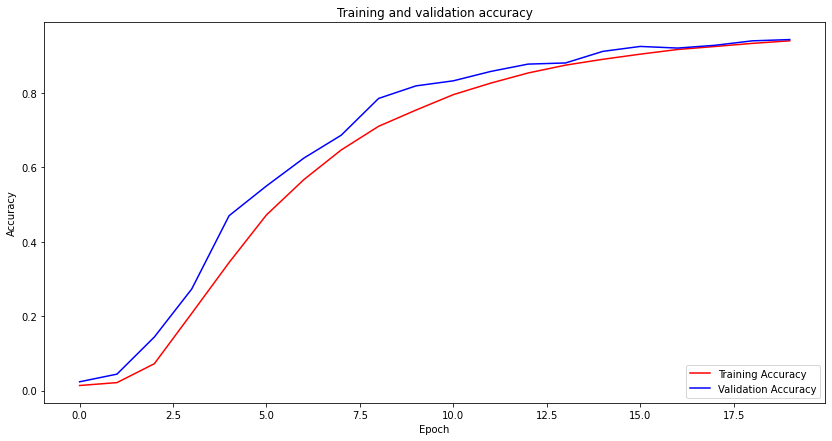

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

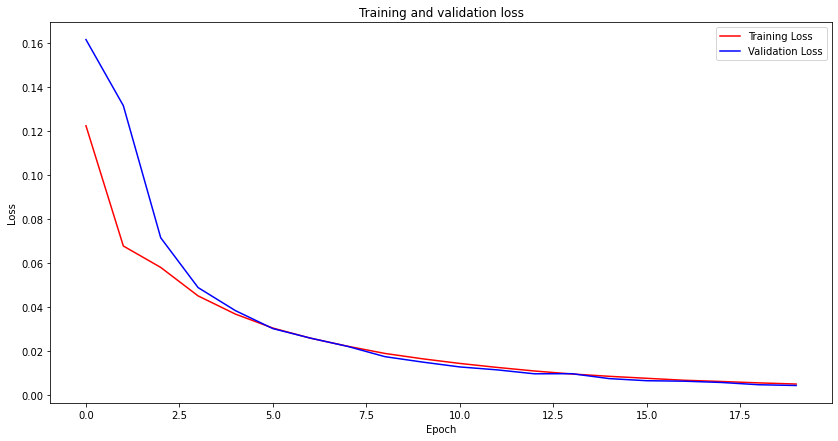

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')